<a href="https://colab.research.google.com/github/m73abbasi/CS-SBU-DataMining-Msc-projects/blob/main/MohammadRezaAbbasi-98422101/project%202/heart_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#heart

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [3]:
# read data
ds = pd.read_csv('/content/drive/MyDrive/heart.csv')
pd.set_option('display.max_columns',None)
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# check number of recourd
ds.shape

(303, 14)

In [5]:
# check information of data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# basic stat report from numeric data
ds[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# normalizing numeric data
for cols in ds.columns:
  if ds[cols].dtype == 'int64' or ds[cols].dtype == 'float64':
    if cols != "target":
      ds[cols] = ((ds[cols]-ds[cols].mean())/(ds[cols].std()))

In [8]:
# delete outlier
for cols in ds.columns:
  if ds[cols].dtype == 'int64' or ds[cols].dtype == 'float64':
    upper_range = ds[cols].mean() + 3 * ds[cols].std()
    lower_range = ds[cols].mean() - 3 * ds[cols].std()
    idx = ds[(ds[cols] > upper_range) | (ds[cols] < lower_range)].index
    ds = ds.drop(idx)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    float64
 1   sex       287 non-null    float64
 2   cp        287 non-null    float64
 3   trestbps  287 non-null    float64
 4   chol      287 non-null    float64
 5   fbs       287 non-null    float64
 6   restecg   287 non-null    float64
 7   thalach   287 non-null    float64
 8   exang     287 non-null    float64
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    float64
 11  ca        287 non-null    float64
 12  thal      287 non-null    float64
 13  target    287 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.6 KB


In [9]:
# split future and target
y = ds['target']
x = ds.drop(columns = ['target'])
print('x.shape =' , x.shape)
print('y.shape =' , y.shape)

x.shape = (287, 13)
y.shape = (287,)


In [10]:
# define dataset x1
x1 = ds[['trestbps','chol','thalach']]

In [11]:
# We divided the data by 80 to 20, which means 80% of training and 20% of testing
X_train, X_test, y_train, y_test = tts( x , y , test_size = 0.2, random_state = 40)
print('X_train.shape =' , X_train.shape)
print('X_test.shape =' , X_test.shape)
print('y_train.shape =' , y_train.shape)
print('y_test.shape =' , y_test.shape)

X_train.shape = (229, 13)
X_test.shape = (58, 13)
y_train.shape = (229,)
y_test.shape = (58,)


X_train.shape = (229, 3)
X_test.shape = (58, 3)
y_train.shape = (229,)
y_test.shape = (58,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

GaussianNB(priors=None, var_smoothing=1e-09)

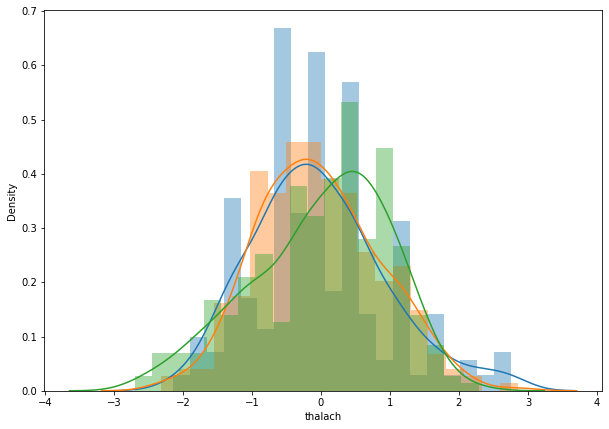

In [12]:
# perform Gaussian naive bayes with pakage
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
print('X_train.shape =' , X_train.shape)
print('X_test.shape =' , X_test.shape)
print('y_train.shape =' , y_train.shape)
print('y_test.shape =' , y_test.shape)
plt.figure(figsize=(10,7))
for i in x1.columns:
  sns.distplot(x1[i],kde_kws={"label": i}, bins=20)
gnb = GaussianNB()
gnb.fit(X_train , y_train)

In [13]:
print("Recall : ",gnb.score(X_test,y_test))

Recall :  0.7241379310344828


In [14]:
# perform Gaussian naive bayes without pakage
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
class GaussianNB1(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.prior = np.bincount(y) / len(y)
        self.max1 = np.max(y) + 1
    
        self.mean1 = np.array([X[np.where(y==i)].mean(axis=0) for i in range(self.max1)])
        self.std1 = np.array([X[np.where(y==i)].std(axis=0) for i in range(self.max1)])
        return self
    def predict_prob(self, X):
        check_is_fitted(self)
        X = check_array(X)

        res = []
        for i in range(len(X)):
            prob = []
            for j in range(self.max1):
                prob.append((1/np.sqrt(2*np.pi*self.std1[j]**2)*np.exp(-0.5*((X[i]-self.mean1[j])/self.std1[j])**2)).prod()*self.priors_[j])
            prob = np.array(prob)
            res.append(prob / prob.sum())
        return np.array(res)

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        res = self.predict_prob(X)
        return res.argmax(axis=1)

gnb = GaussianNB1()
gnb.fit(X_train, y_train)

GaussianNB1()

In [15]:
# Calculate the error value of the model Gaussian
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred = gnb.predict(X_test)
print("F1-score : ",f1_score(y_test, pred, average='macro'))
print("Precision : ",precision_score(y_test, pred, average='macro'))
print("Recall : ",recall_score(y_test, pred, average='macro'))

F1-score :  0.7187878787878788
Precision :  0.7425997425997426
Recall :  0.7241379310344827


In [16]:
# perform Bernoulli naive bayes with pakage
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
print('X_train.shape =' , X_train.shape)
print('X_test.shape =' , X_test.shape)
print('y_train.shape =' , y_train.shape)
print('y_test.shape =' , y_test.shape)
bnb = BernoulliNB()
bnb.fit(X_train , y_train)

X_train.shape = (229, 3)
X_test.shape = (58, 3)
y_train.shape = (229,)
y_test.shape = (58,)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
# Calculate the error value of the model Bernoulli
pred = bnb.predict(X_test)
print("F1-score : ",f1_score(y_test, pred, average='macro'))
print("Precision : ",precision_score(y_test, pred, average='macro'))
print("Recall : ",recall_score(y_test, pred, average='macro'))

F1-score :  0.8102884329467737
Precision :  0.8107142857142857
Recall :  0.8103448275862069


In [18]:
# Create a SVM classifier
svclassifier = svm.SVC()
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[18 11]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.69      0.86      0.77        29

    accuracy                           0.74        58
   macro avg       0.76      0.74      0.74        58
weighted avg       0.76      0.74      0.74        58



In [19]:
# Create a Radial basis function SVM classifier
svclassifier = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[18 11]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.69      0.86      0.77        29

    accuracy                           0.74        58
   macro avg       0.76      0.74      0.74        58
weighted avg       0.76      0.74      0.74        58



In [20]:
# Create a polynomial SVM classifier
svclassifier = svm.SVC(kernel='poly')
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[11 18]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        29
           1       0.58      0.86      0.69        29

    accuracy                           0.62        58
   macro avg       0.66      0.62      0.60        58
weighted avg       0.66      0.62      0.60        58



In [21]:
# Create a linear SVM classifier
svclassifier = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[18 11]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.70      0.90      0.79        29

    accuracy                           0.76        58
   macro avg       0.78      0.76      0.75        58
weighted avg       0.78      0.76      0.75        58



In [22]:
# Create a SVM classifier on all dataset
svclassifier = svm.SVC()
X_train, X_test, y_train, y_test = tts( x , y , test_size = 0.2, random_state = 0)
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[25  4]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.86      0.86      0.86        29

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [23]:
# 5-fold Cross Validation with SVM classifier on all dataset
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(x):
  print("train_index : ",train_index ,'\n',"test_index : ",test_index,'\n')
  x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  svclassifier = svm.SVC().fit(x_train, y_train)
  score = svclassifier.score(x_test, y_test)
  print(score,'\n')

train_index :  [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286] 
 test_index :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12

In [24]:
# By using all the features in the training dataset with 2 of neighbors
knn = KNeighborsClassifier(n_neighbors = 2)
X_train, X_test, y_train, y_test = tts( x , y , test_size = 0.2, random_state = 0)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8103448275862069

In [25]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[26  3]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.88      0.72      0.79        29

    accuracy                           0.81        58
   macro avg       0.82      0.81      0.81        58
weighted avg       0.82      0.81      0.81        58



In [26]:
# By using all the features in the training dataset with 4 of neighbors
knn = KNeighborsClassifier(n_neighbors = 4)
X_train, X_test, y_train, y_test = tts( x , y , test_size = 0.2, random_state = 0)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8620689655172413

In [27]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[26  3]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.89      0.83      0.86        29

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [28]:
# By using features (trestbps , chol , thalach) in the training dataset with 2 of neighbors
knn = KNeighborsClassifier(n_neighbors = 2)
X_train, X_test, y_train, y_test = tts( x1 , y , test_size = 0.2, random_state = 0)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.5517241379310345

In [29]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[21  8]
 [18 11]]
              precision    recall  f1-score   support

           0       0.54      0.72      0.62        29
           1       0.58      0.38      0.46        29

    accuracy                           0.55        58
   macro avg       0.56      0.55      0.54        58
weighted avg       0.56      0.55      0.54        58

